## Exploratory Data Analisys
### Topic (**Inflation**) according to news portal

### Load

In [7]:
import pandas as pd
import numpy as np

Tokens

In [8]:
tokens_izq = pd.read_pickle('tokens/topic_tokens_izq_new.pkl')
tokens_der = pd.read_pickle('tokens/topic_tokens_der_new.pkl')

In [9]:
tokens_izq_inf = tokens_izq[tokens_izq.topics == 'inflation'].drop('topics', axis=1)
tokens_izq_inf.insert(loc=0, column='publication', value='left')

In [10]:
tokens_der_inf = tokens_der[tokens_der.topics == 'inflation'].drop('topics', axis=1)
tokens_der_inf.insert(loc=0, column='publication', value='right')

In [11]:
tokens = tokens_izq_inf.append(tokens_der_inf)
tokens.reset_index(inplace=True)
tokens.drop('index', axis=1, inplace=True)
tokens.fillna(0, inplace=True)

In [12]:
tokens.sample(5)

,publication,abajo,abarca,abierta,abiertamente,abierto,abiertos,abre,abril,abrilasi,...,vuelva,vuelvan,woyecheszen,xx,yaguarete,york,yuanes,zamora,zonaprop,zonas
58,right,0,0.0,0,0.0,0,0.0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,right,0,0.0,0,0.0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,left,0,0.0,0,0.0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,right,0,0.0,0,0.0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,left,0,0.0,0,0.0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Train - Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# data balance
tokens.publication.value_counts(normalize=True)

left     0.514706
right    0.485294
Name: publication, dtype: float64

In [15]:
X = tokens.drop('publication', axis=1)

In [16]:
y = tokens['publication']

In [17]:
train, test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify=tokens.publication)

In [18]:
train.shape, test.shape

((51, 6420), (17, 6420))

In [19]:
# data balance
display(y_train.value_counts(normalize=True), y_test.value_counts(normalize=True))

left     0.509804
right    0.490196
Name: publication, dtype: float64

left     0.529412
right    0.470588
Name: publication, dtype: float64

Vectorización con TF-IDF

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer

In [21]:
train_tfidf = TfidfTransformer().fit_transform(train);

In [22]:
test_tfidf = TfidfTransformer().fit_transform(test);

### MultinomialNB
Model + CountVectorizer (manual)

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
multi_nb = MultinomialNB()
multi_nb.fit(train, y_train)

MultinomialNB()

In [25]:
y_pred = multi_nb.predict(test)

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [27]:
display(accuracy_score(y_pred, y_test), confusion_matrix(y_pred, y_test))

0.9411764705882353

array([[8, 0],
       [1, 8]])

Modelo + TfIDf

In [28]:
multi_nb_2 = MultinomialNB()
multi_nb_2.fit(train_tfidf, y_train)

MultinomialNB()

In [29]:
y_pred_2 = multi_nb_2.predict(test)

In [30]:
display(accuracy_score(y_pred_2, y_test.values), confusion_matrix(y_pred_2, y_test))

0.8235294117647058

array([[7, 1],
       [2, 7]])

### Logistic Regression
Model + CountVectorizer (manual)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logistic_regression = LogisticRegression()
logistic_regression.fit(train, y_train)

LogisticRegression()

In [33]:
y_pred_log = logistic_regression.predict(test)

In [34]:
display(accuracy_score(y_pred_log, y_test), confusion_matrix(y_pred_log, y_test))

0.8823529411764706

array([[9, 2],
       [0, 6]])

In [35]:
y_pred_log_proba = logistic_regression.predict_proba(test)

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

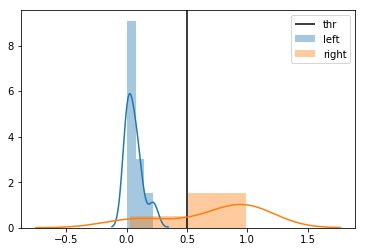

In [37]:
sns.distplot(y_pred_log_proba[y_test=='left'][:,1])
sns.distplot(y_pred_log_proba[y_test=='right'][:,1])
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['thr', 'left', 'right'])

Model + TfIDf

In [38]:
logistic_regression_2 = LogisticRegression()
logistic_regression_2.fit(train_tfidf, y_train)

LogisticRegression()

In [39]:
y_pred_log_2 = logistic_regression_2.predict(test_tfidf)

In [40]:
display(accuracy_score(y_pred_log_2, y_test), confusion_matrix(y_pred_log_2, y_test))

0.8823529411764706

array([[8, 1],
       [1, 7]])

In [41]:
y_pred_log_2_proba = logistic_regression_2.predict_proba(test)

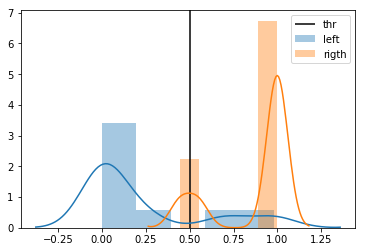

In [42]:
sns.distplot(y_pred_log_2_proba[y_test=='left'][:,1])
sns.distplot(y_pred_log_2_proba[y_test=='right'][:,1])
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['thr', 'left', 'rigth'])